### Import Necessary Libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
%matplotlib inline

In [70]:
#Load file
cab_df = pd.read_csv('Predict_Cab_Price.csv')

cab_df.head()

,miles,temp,rain,ncabs,price
0,1,30,0,10,20
1,1,38,0,5,40
2,1,25,0,1,50
3,1,20,1,10,50
4,1,15,1,4,80


### Exploratory Data Analysis

In [71]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   miles   60 non-null     int64
 1   temp    60 non-null     int64
 2   rain    60 non-null     int64
 3   ncabs   60 non-null     int64
 4   price   60 non-null     int64
dtypes: int64(5)
memory usage: 2.5 KB


observations : 5 rows with 60 non-null in integer datatype

<AxesSubplot:>

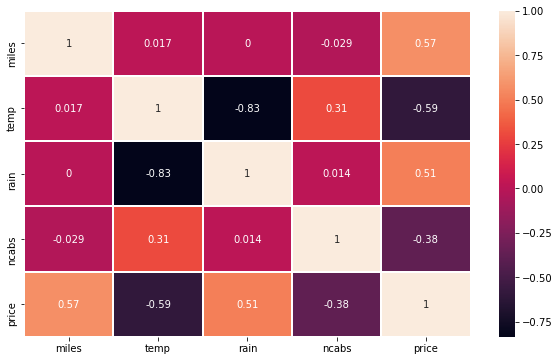

In [125]:
corr = cab_df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot = True, linewidths = 1)

observations : There is negative relation between temperature and rain. There is higher chances of rainfall while temperature is low

<AxesSubplot:xlabel='temp', ylabel='price'>

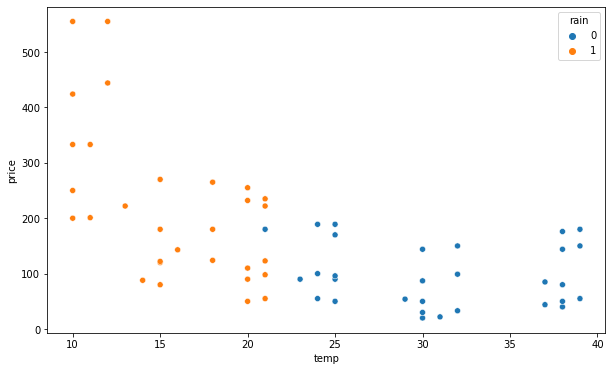

In [137]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = cab_df['temp'], y = cab_df['price'], hue = cab_df['rain'])
#Cab price are higher during low temperature and its raining

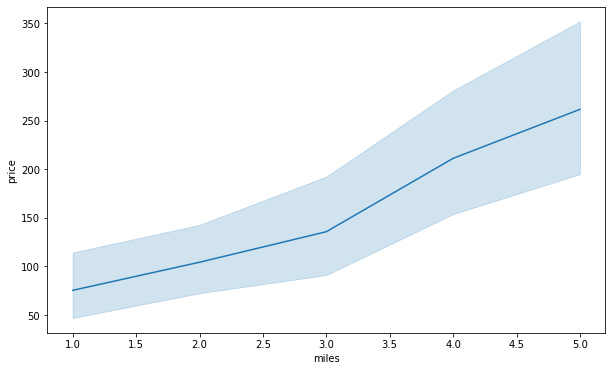

In [141]:
plt.figure(figsize = (10,6))
sns.lineplot(x = cab_df['miles'], y = cab_df['price']);
#Longer the miles travelling, higher will be the price

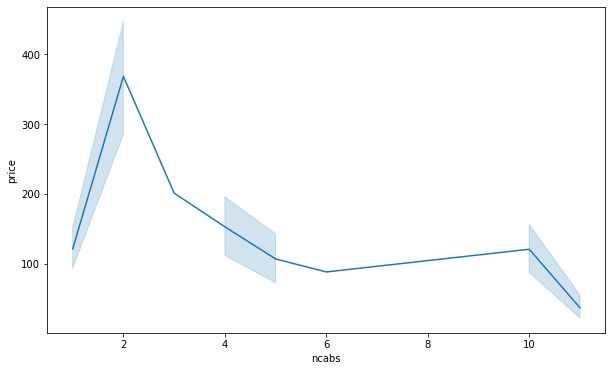

In [154]:
plt.figure(figsize = (10,6))
sns.lineplot(x = cab_df['ncabs'], y = cab_df['price']);
#Larger the no. of cabs, the prices of cab is lower 

### train and test split

In [162]:
X = cab_df.drop(['price'], axis=1)

y = cab_df['price']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

### Modelling

In [164]:
lm = LinearRegression()

In [165]:
lm.fit(X_train, y_train)

LinearRegression()

In [166]:
test_pre = lm.predict(X_test)

In [167]:
train_pred = lm.predict(X_train)

### Linear model stats

In [168]:
print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

print('-------------------------------')

print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pre))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pre))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pre)))

print('Test R2: ', metrics.r2_score(y_test, test_pre))

Train MAE:  49.94735894595363
Train MSE:  4065.480459049744
Train RSME:  63.76112027756212
Train R2:  0.7503192846106234
-------------------------------
Test MAE:  41.673370945810554
Test MSE:  2999.751361260689
Test RSME:  54.76998595271583
Test R2:  0.6707710418966842


In [117]:
X = sm.add_constant(X)

In [118]:
reg_ols = sm.OLS(y, X).fit()

In [119]:
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     38.94
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           1.92e-15
Time:                        22:20:56   Log-Likelihood:                -331.52
No. Observations:                  60   AIC:                             673.0
Df Residuals:                      55   BIC:                             683.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        118.5308     57.870      2.048      0.045       2.557     234.504
miles         47.6693      5.803      8.215      0.000      36.041      59.298
temp          -3.7564      2.012     -1.867      0.067      -7.788       0.275
rain          65.8331     34.775      1.893      0.064      -3.858     135.524
ncabs         -9.0571      2.799     -3.235      0.002     -14.667      -3.447
==============================================================================
Omnibus:                       13.680   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.913
Skew:                           0.957   Prob(JB):                     0.000350
Kurtosis:                       4.643   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plotting Predicted V

<AxesSubplot:xlabel='price'>

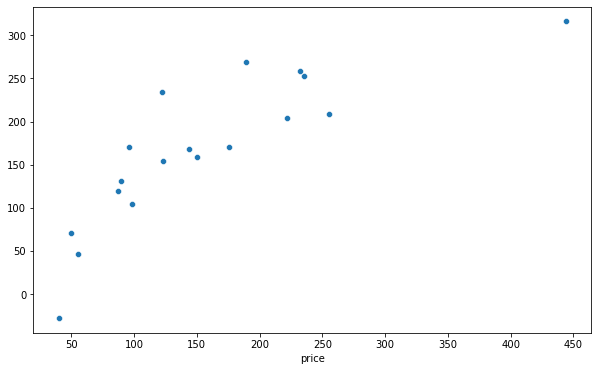

In [149]:
#test set and test predicted set scatter plot 
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = y_pre)

<AxesSubplot:xlabel='price'>

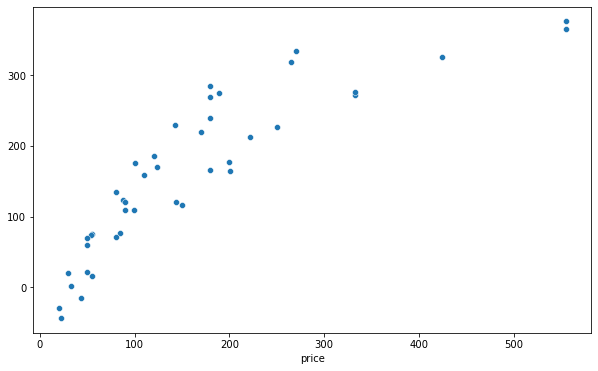

In [152]:
#train set and train predicted set scatter plot 
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_train, y = train_pred)

<AxesSubplot:xlabel='price', ylabel='Density'>

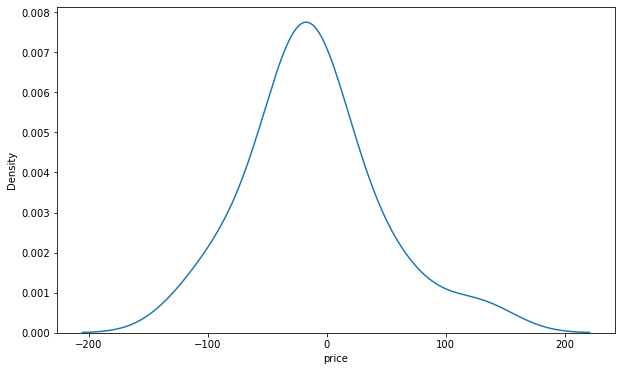

In [150]:
#Errors are following normal distributions
plt.figure(figsize = (10,6))
sns.kdeplot((y_test-y_pre))

<AxesSubplot:ylabel='Density'>

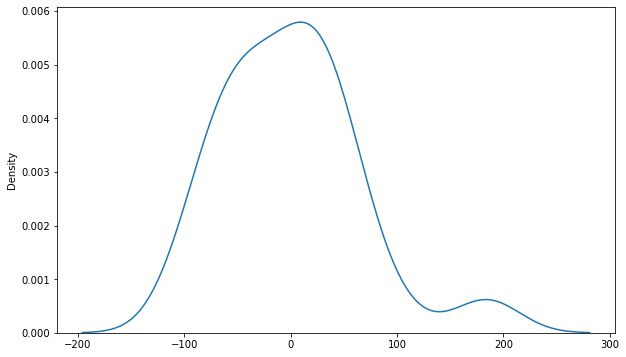

In [151]:
#Errors are following normal distributions
plt.figure(figsize = (10,6))
sns.kdeplot(np.array(y_train) - pre)

In [127]:
print('Intercept: ',round(lm.intercept_,2))
pd.DataFrame(data = lm.coef_, index = cab_df.columns[:4], columns=['Coefficient'])

Intercept:  155.15


,Coefficient
miles,49.584626
temp,-5.014873
rain,39.541065
ncabs,-8.408952


### Interpretations

* For 1 unit increase in miles there will be 49.58 unit price increase
* For 1 unit increase in temperature there will be -5.01 unit price decrease
* For 1 unit increase in rain there will be 39.541 unit price increase
* For 1 unit increase in ncabd there will be 8.40 unit price decrease
* Cab price will have minimum value of 155.15